In [1]:
#Import Necessary Libraries
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
import joblib
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
def load_data(csv_file_name):
    with open(csv_file_name) as f:
        df = pd.read_csv(f)
        df.dropna(inplace=True)
    return df

In [3]:
def preprocess_data(df):
    # Normalize the data
    scaler = MinMaxScaler()
    scaled_data = scaler.fit_transform(df)

    return scaled_data, scaler

In [4]:
def save_preprocessed_data(data, scaler, save_path, scaler_path='scaler.pkl'):
    np.save(save_path, data)

    import joblib
    joblib.dump(scaler, scaler_path)

In [6]:
csv_file_name = '/content/drive/MyDrive/data/bitstampUSD_1-min_data_2012-01-01_to_2020-04-22.csv'
data = load_data(csv_file_name)
# preprocessed_data, scaler = preprocess_data(data)
# save_preprocessed_data(preprocessed_data, scaler, 'preprocessed_data.npy', 'scaler.pkl')


In [8]:
file_path2 = '/content/drive/MyDrive/data/coinbaseUSD_1-min_data_2014-12-01_to_2019-01-09.csv'
data2 = load_data(file_path2)
preprocessed_data2, scaler2 = preprocess_data(data2)
save_preprocessed_data(preprocessed_data2, scaler2, 'preprocessed_data2.npy', 'scaler2.pkl')

In [9]:
data2.head()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,1417411980,300.0,300.0,300.0,300.0,0.010000,3.00000,300.0
7,1417412400,300.0,300.0,300.0,300.0,0.010000,3.00000,300.0
51,1417415040,370.0,370.0,370.0,370.0,0.010000,3.70000,370.0
77,1417416600,370.0,370.0,370.0,370.0,0.026556,9.82555,370.0
1436,1417498140,377.0,377.0,377.0,377.0,0.010000,3.77000,377.0


In [10]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1990691 entries, 0 to 2099759
Data columns (total 8 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Timestamp          int64  
 1   Open               float64
 2   High               float64
 3   Low                float64
 4   Close              float64
 5   Volume_(BTC)       float64
 6   Volume_(Currency)  float64
 7   Weighted_Price     float64
dtypes: float64(7), int64(1)
memory usage: 136.7 MB


In [11]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1990691 entries, 0 to 2099759
Data columns (total 8 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Timestamp          int64  
 1   Open               float64
 2   High               float64
 3   Low                float64
 4   Close              float64
 5   Volume_(BTC)       float64
 6   Volume_(Currency)  float64
 7   Weighted_Price     float64
dtypes: float64(7), int64(1)
memory usage: 136.7 MB


In [12]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
import joblib
import matplotlib.pyplot as plt

In [13]:
def create_dataset(data, time_step=24):
    X, y = [], []
    for i in range(len(data) - time_step - 1):
        a = data[i:(i + time_step), :-1]
        X.append(a)
        y.append(data[i + time_step, -1])
    return np.array(X), np.array(y)

In [14]:
def build_model(input_shape):
    model = Sequential()
    model.add(LSTM(50, return_sequences=True, input_shape=input_shape))
    model.add(LSTM(50, return_sequences=False))
    model.add(Dense(25))
    model.add(Dense(1))

    model.compile(optimizer=Adam(), loss='mean_squared_error')
    return model

In [15]:
# Load the preprocessed data
data = np.load('preprocessed_data2.npy')

In [16]:
# Create the dataset
time_step = 24  # Use past 24 hours data
X, y = create_dataset(data, time_step)

In [17]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Reshape the data to fit the LSTM model
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2])
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2])

In [18]:
# Build the model
model = build_model((X_train.shape[1], X_train.shape[2]))

# Train the model
history = model.fit(X_train, y_train, batch_size=64, epochs=15, validation_data=(X_test, y_test))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/15
24884/24884 ━━━━━━━━━━━━━━━━━━━━ 970s 39ms/step - loss: 5.0973e-05 - val_loss: 5.9671e-06
Epoch 2/15
24884/24884 ━━━━━━━━━━━━━━━━━━━━ 936s 37ms/step - loss: 1.2146e-06 - val_loss: 2.3572e-07
Epoch 3/15
24884/24884 ━━━━━━━━━━━━━━━━━━━━ 917s 37ms/step - loss: 8.2391e-07 - val_loss: 1.5393e-06
Epoch 4/15
24884/24884 ━━━━━━━━━━━━━━━━━━━━ 952s 38ms/step - loss: 6.2698e-07 - val_loss: 1.2938e-07
Epoch 5/15
24884/24884 ━━━━━━━━━━━━━━━━━━━━ 1011s 39ms/step - loss: 5.1515e-07 - val_loss: 1.6974e-07
Epoch 6/15
24884/24884 ━━━━━━━━━━━━━━━━━━━━ 932s 37ms/step - loss: 4.9282e-07 - val_loss: 3.3036e-07
Epoch 7/15
24884/24884 ━━━━━━━━━━━━━━━━━━━━ 926s 37ms/step - loss: 4.3949e-07 - val_loss: 3.6993e-07
Epoch 8/15
24884/24884 ━━━━━━━━━━━━━━━━━━━━ 952s 38ms/step - loss: 4.1678e-07 - val_loss: 8.4628e-08
Epoch 9/15
24884/24884 ━━━━━━━━━━━━━━━━━━━━ 961s 37ms/step - loss: 3.8375e-07 - val_loss: 3.7145e-07
Epoch 10/15
24884/24884 ━━━━━━━━━━━━━━━━━━━━ 982s 37ms/step - loss: 3.6625e-07 - val_loss:

In [19]:
# Save the model
model.save('btc_forecasting_model.h5')

In [20]:
def plot_training_history(history):
    plt.figure(figsize=(12, 6))
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Training and Validation Loss')
    plt.legend()
    plt.show()

In [21]:
def calculate_accuracy(y_true, y_pred):
    accuracy = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    return 100 - accuracy

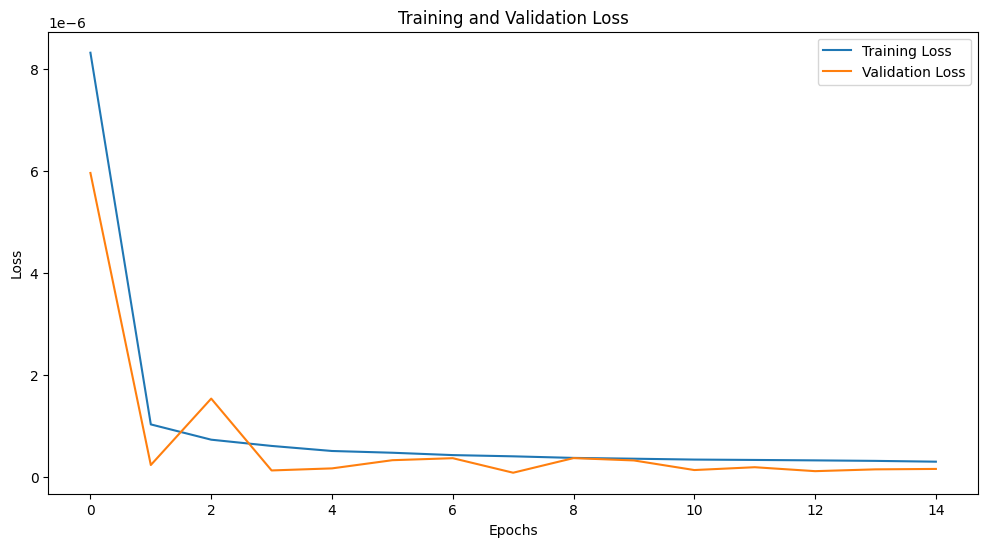

In [22]:
# Plot the training history
plot_training_history(history)